In [2]:
pip install opencv-python

     ---------------------------------------- 38.2/38.2 MB 1.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np 
import pandas as pd 
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from sklearn.metrics import accuracy_score
import ipywidgets as widgets
import io
import os
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [4]:
X_train = []
y_train = []
X_test = []
y_test = []
image_size = 150

In [6]:
train_path = "C:\\Users\\Nanda\\OneDrive\\Documents\\project\\brain diseases\\New_Data\\Train"
labels = os.listdir(train_path)
print(labels)
print(len(labels))

['Alzheimer-MildDemented', 'Alzheimer-ModerateDemented', 'Alzheimer-NonDemented', 'Alzheimer-VeryMildDemented', 'Brain_Tumor-glioma_tumor', 'Brain_Tumor-glioma_tumor-meningioma_tumor', 'Brain_Tumor-glioma_tumor-pituitary_tumor', 'Healthy_Brain', 'Multiple Sclerosis-Control-Axial', 'Multiple Sclerosis-Control-Sagittal', 'Multiple Sclerosis-MS-Axial', 'Multiple Sclerosis-MS-Sagittal']
12


In [7]:
# Number of images for each disease
diseases = os.listdir(train_path)
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir(train_path + '/' + disease))
    
# converting the nums dictionary to pandas dataframe passing index as plant name and number of images as column

img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["No.of images"])
img_per_class

,No.of images
Alzheimer-MildDemented,717
Alzheimer-ModerateDemented,52
Alzheimer-NonDemented,2560
Alzheimer-VeryMildDemented,1792
Brain_Tumor-glioma_tumor,826
Brain_Tumor-glioma_tumor-meningioma_tumor,822
Brain_Tumor-glioma_tumor-pituitary_tumor,837
Healthy_Brain,395
Multiple Sclerosis-Control-Axial,1002
Multiple Sclerosis-Control-Sagittal,1014


In [8]:
for i in labels:
    folder_path = os.path.join(train_path, i)
    for j in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, j))
        img = cv2.resize(img, (image_size, image_size))
        
        X_train.append(img)
        y_train.append(i)

In [9]:
test_path ="C:\\Users\\Nanda\\OneDrive\\Documents\\project\\brain diseases\\New_Data\\Test"

In [10]:
for i in labels:
    folder_path = os.path.join(test_path, i)
    for j in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, j))
        img = cv2.resize(img, (image_size, image_size))
        
        X_test.append(img)
        y_test.append(i)

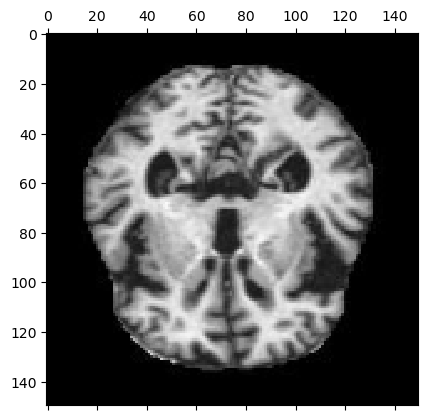

In [11]:
import matplotlib.pyplot as plt
plt.matshow(X_train[1])

In [12]:
# X_train.shape, y_train.shape
len(X_train), len(y_train)

(11428, 11428)

In [13]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [14]:
X_train.shape, y_train.shape

((11428, 150, 150, 3), (11428,))

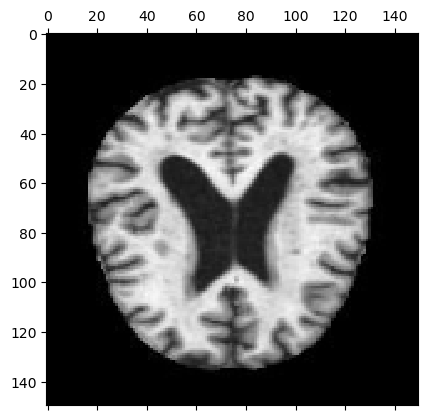

In [15]:
plt.matshow(X_test[7])

In [16]:
y_test[7]

'Alzheimer-MildDemented'

In [17]:
X_train, y_train = shuffle(X_train, y_train, random_state = 99)
X_train.shape, y_train.shape

((11428, 150, 150, 3), (11428,))

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.1, random_state = 100)

In [23]:
y_train[:5]

array(['Alzheimer-NonDemented', 'Alzheimer-NonDemented',
       'Multiple Sclerosis-Control-Sagittal', 'Alzheimer-NonDemented',
       'Multiple Sclerosis-MS-Sagittal'], dtype='<U41')

In [24]:
len(X_test)

1143

In [25]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))

y_train_new[:5]

[2, 2, 9, 2, 11]

In [26]:
y_train_new = tf.keras.utils.to_categorical(y_train_new)
y_train_new

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [27]:
y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))

y_test_new = tf.keras.utils.to_categorical(y_test_new)
y_test_new

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [28]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (image_size, image_size, 3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(Dropout(0.3))


model.add(Flatten())

model.add(Dense(512, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(12, activation = 'softmax'))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 36, 36, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        3

In [30]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [31]:
hist = model.fit(X_train, y_train_new, epochs = 30, validation_split = 0.1)

Epoch 1/30
290/290 [==============================] - 202s 695ms/step - loss: 2.6823 - accuracy: 0.5271 - val_loss: 0.8129 - val_accuracy: 0.6307
Epoch 2/30
290/290 [==============================] - 219s 754ms/step - loss: 0.7515 - accuracy: 0.6758 - val_loss: 0.6599 - val_accuracy: 0.7017
Epoch 3/30
290/290 [==============================] - 250s 863ms/step - loss: 0.6392 - accuracy: 0.7142 - val_loss: 0.5878 - val_accuracy: 0.7512
Epoch 4/30
290/290 [==============================] - 234s 808ms/step - loss: 0.5172 - accuracy: 0.7766 - val_loss: 0.5399 - val_accuracy: 0.7794
Epoch 5/30
290/290 [==============================] - 228s 788ms/step - loss: 0.4349 - accuracy: 0.8122 - val_loss: 0.5265 - val_accuracy: 0.8163
Epoch 6/30
290/290 [==============================] - 225s 775ms/step - loss: 0.3692 - accuracy: 0.8509 - val_loss: 0.4560 - val_accuracy: 0.8338
Epoch 7/30
290/290 [==============================] - 221s 764ms/step - loss: 0.3066 - accuracy: 0.8818 - val_loss: 0.4362 -

In [32]:
model.save("Brain_Tumor_Image_Classification_Model.h5")

In [34]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [35]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy'] 

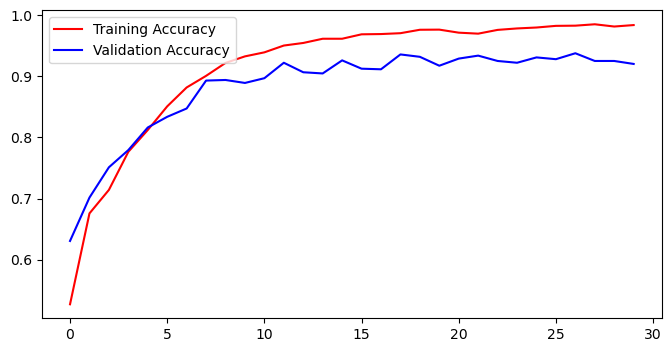

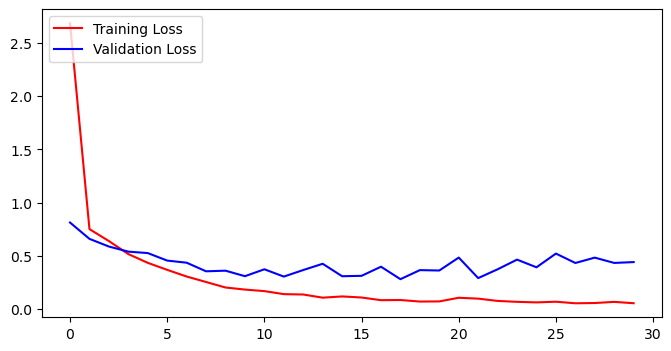

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

epochs = range(len(acc))
fig = plt.figure(figsize = (8,4))
plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.legend(loc = 'upper left')
plt.show()

loss = hist.history['loss']
val_loss = hist.history['val_loss'] 

epochs = range(len(acc))
fig = plt.figure(figsize = (8,4))
plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.legend(loc = 'upper left')
plt.show()

In [39]:
loss,acc = model.evaluate(X_test,y_test_new)

36/36 [==============================] - 3s 75ms/step - loss: 0.4058 - accuracy: 0.9431


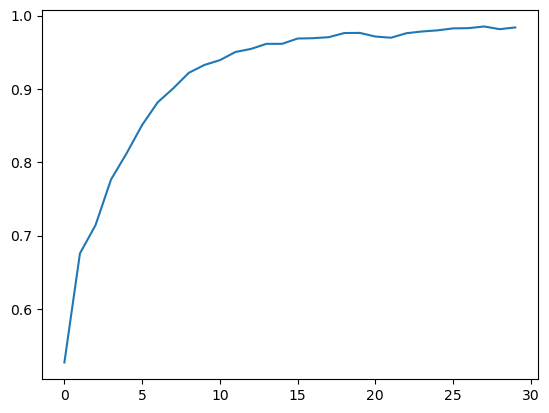

In [40]:
from matplotlib import pyplot
pyplot.plot(hist.history['accuracy'])
pyplot.show()

In [42]:

from sklearn.metrics import classification_report

# Make predictions on test set
y_pred = model.predict(X_test)

# Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)

# Compute classification report
target_names = ['Alzheimer-MildDemented', 'Alzheimer-ModerateDemented', 'Alzheimer-NonDemented', 'Alzheimer-VeryMildDemented', 
                'Brain_Tumor-glioma_tumor', 'Brain_Tumor-glioma_tumor-meningioma_tumor', 'Brain_Tumor-glioma_tumor-pituitary_tumor', 'Healthy_Brain', 
                'Multiple Sclerosis-Control-Axial', 'Multiple Sclerosis-Control-Sagittal', 'Multiple Sclerosis-MS-Axial', 'Multiple Sclerosis-MS-Sagittal']
print(classification_report(np.argmax(y_test_new, axis=1), y_pred, target_names=target_names))


36/36 [==============================] - 3s 76ms/step
                                           precision    recall  f1-score   support

                   Alzheimer-MildDemented       0.97      0.99      0.98        68
               Alzheimer-ModerateDemented       1.00      1.00      1.00         5
                    Alzheimer-NonDemented       0.96      1.00      0.98       232
               Alzheimer-VeryMildDemented       0.99      0.95      0.97       196
                 Brain_Tumor-glioma_tumor       0.84      0.98      0.90        90
Brain_Tumor-glioma_tumor-meningioma_tumor       0.93      0.77      0.84        86
 Brain_Tumor-glioma_tumor-pituitary_tumor       0.87      0.96      0.91        78
                            Healthy_Brain       0.92      0.74      0.82        47
         Multiple Sclerosis-Control-Axial       0.93      0.98      0.95       103
      Multiple Sclerosis-Control-Sagittal       0.99      0.95      0.97       101
              Multiple Sclerosis

In [43]:
from sklearn.metrics import classification_report
from tabulate import tabulate

# Make predictions on test set
y_pred = model.predict(X_test)

# Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)

# Generate classification report
target_names = ['Alzheimer-MildDemented', 'Alzheimer-ModerateDemented', 'Alzheimer-NonDemented', 'Alzheimer-VeryMildDemented', 
                'Brain_Tumor-glioma_tumor', 'Brain_Tumor-glioma_tumor-meningioma_tumor', 'Brain_Tumor-glioma_tumor-pituitary_tumor', 'Healthy_Brain', 
                'Multiple Sclerosis-Control-Axial', 'Multiple Sclerosis-Control-Sagittal', 'Multiple Sclerosis-MS-Axial', 'Multiple Sclerosis-MS-Sagittal']

report = classification_report(np.argmax(y_test_new, axis=1), y_pred, target_names=target_names, digits=2, output_dict=True)

# Convert report to table
table = []
for label, metrics in report.items():
    if label in target_names:
        table.append([label,
                      metrics['precision'],
                      metrics['recall'],
                      metrics['f1-score'],
                      metrics['support']])

# Print table
print(tabulate(table, headers=['Class', 'Precision', 'Recall', 'F1 Score', 'Support'], tablefmt='orgtbl'))


36/36 [==============================] - 3s 73ms/step
| Class                                     |   Precision |   Recall |   F1 Score |   Support |
|-------------------------------------------+-------------+----------+------------+-----------|
| Alzheimer-MildDemented                    |    0.971014 | 0.985294 |   0.978102 |        68 |
| Alzheimer-ModerateDemented                |    1        | 1        |   1        |         5 |
| Alzheimer-NonDemented                     |    0.958506 | 0.99569  |   0.976744 |       232 |
| Alzheimer-VeryMildDemented                |    0.994652 | 0.94898  |   0.971279 |       196 |
| Brain_Tumor-glioma_tumor                  |    0.838095 | 0.977778 |   0.902564 |        90 |
| Brain_Tumor-glioma_tumor-meningioma_tumor |    0.929577 | 0.767442 |   0.840764 |        86 |
| Brain_Tumor-glioma_tumor-pituitary_tumor  |    0.872093 | 0.961538 |   0.914634 |        78 |
| Healthy_Brain                             |    0.921053 | 0.744681 |   0.823529 

In [44]:
from tensorflow import keras
model = keras.models.load_model('C:\\Users\\Nanda\\OneDrive\\Documents\\project\\Brain_Tumor_Image_Classification_Model.h5')

In [46]:

from tensorflow.keras.preprocessing import image
img_path = 'C:\\Users\\Nanda\\OneDrive\\Documents\\project\\brain diseases\\New_Data\\Train\\Multiple Sclerosis-Control-Axial\\C-A (67).png'
img = cv2.imread(img_path)
img = cv2.resize(img, (150, 150))
img_array = np.array(img)
img_array.shape
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

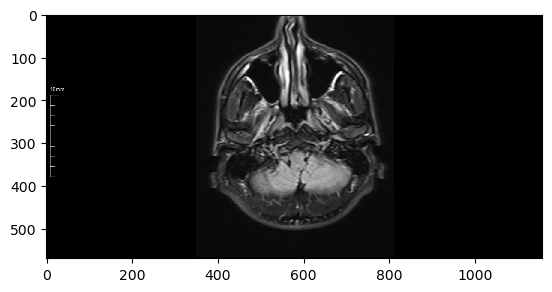

In [47]:
import matplotlib.pyplot as plt
img = image.load_img(img_path)
plt.imshow(img, interpolation = 'nearest')
plt.show()

In [48]:
a = model.predict(img_array)
print(a)

1/1 [==============================] - 0s 63ms/step
[[1.48670613e-14 7.37439654e-27 5.03806661e-17 5.43815004e-16
  6.26335039e-18 1.92990191e-18 1.18873288e-11 1.59700676e-13
  1.00000000e+00 1.33577229e-21 1.98175254e-10 1.35511575e-14]]


In [49]:
labels[a.argmax()]

'Multiple Sclerosis-Control-Axial'